In [1]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


#remove next lines if GPU is not set
gp=tf.config.list_physical_devices('GPU')
print(gp)
tf.config.experimental.set_memory_growth(gp[0],True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


### FMNIST dataset
### CNNs

(-0.5, 619.5, 309.5, -0.5)

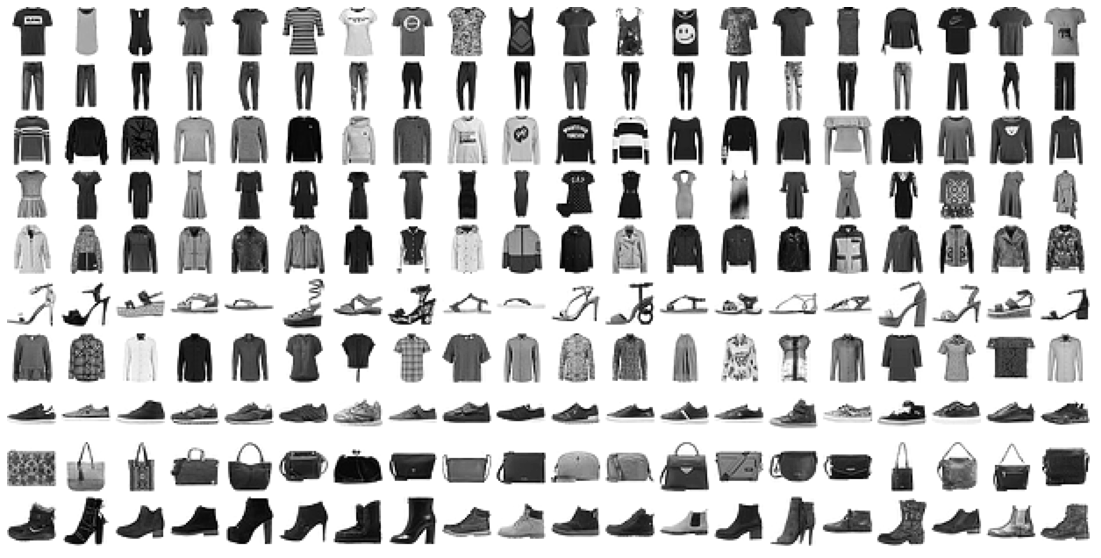

In [2]:
fmnist=keras.datasets.fashion_mnist
(X1,y1),(X2,y2)=fmnist.load_data()
X1=X1*1.
X2=X2*1.
idxList=[]
for i in range(10):
    idxTemp=np.argwhere(y1==i).squeeze()
    idxList.append(idxTemp)


for i in range(10):
    idx=idxList[i]
    for n in range(20):
        if n==0:
            Img=np.hstack((255-X1[idx[n]],np.ones((28,3))*255))
        else:
            Img=np.hstack((Img,255-X1[idx[n]],np.ones((28,3))*255))

    if i==0:
        ImgT=np.vstack((Img,np.ones((3,Img.shape[1]))*255))
    else:
        ImgT=np.vstack((ImgT,Img,np.ones((3,Img.shape[1]))*255))

plt.figure(figsize=(20,10))
plt.imshow(ImgT,cmap='gray')
plt.axis('off')

In [5]:
classNames=['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Boot']

#### Convert classes to vectors

In [6]:
Y1=keras.utils.to_categorical(y1)
Y2=keras.utils.to_categorical(y2)
print(Y1.shape,Y2.shape)

(60000, 10) (10000, 10)


#### add extra dimension to the images

In [7]:
X1b=X1[:,:,:,np.newaxis]
X2b=X2[:,:,:,np.newaxis]
print(X1b.shape,X2b.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


### Create a CNN

In [6]:
cnn=keras.Sequential()
cnn.add(keras.layers.Conv2D(16,(3,3),input_shape=(28,28,1),activation='relu',padding='same'))
cnn.add(keras.layers.Conv2D(16,(3,3),activation='relu',padding='same'))
cnn.add(keras.layers.AveragePooling2D((2,2)))
cnn.add(keras.layers.Conv2D(16*2,(3,3),activation='relu',padding='same'))
cnn.add(keras.layers.Conv2D(16*2,(3,3),activation='relu',padding='same'))
cnn.add(keras.layers.AveragePooling2D((2,2)))
cnn.add(keras.layers.Conv2D(16*4,(3,3),activation='relu',padding='valid'))
cnn.add(keras.layers.Conv2D(16*4,(3,3),activation='relu',padding='valid'))
cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(50,activation='relu'))
cnn.add(keras.layers.Dense(10,activation='softmax'))

In [9]:
cnn.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
average_pooling2d_1 (Average (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 5, 64)          1

In [7]:
cnn.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
train=cnn.fit(X1b,Y1,epochs=20,batch_size=50,validation_data=(X2b,Y2))

Epoch 1/20
1200/1200 [==============================] - 29s 23ms/step - loss: 0.4399 - accuracy: 0.8412 - val_loss: 0.3534 - val_accuracy: 0.8729
Epoch 2/20
1200/1200 [==============================] - 28s 23ms/step - loss: 0.2923 - accuracy: 0.8940 - val_loss: 0.3249 - val_accuracy: 0.8827
Epoch 3/20
1200/1200 [==============================] - 28s 23ms/step - loss: 0.2498 - accuracy: 0.9082 - val_loss: 0.3149 - val_accuracy: 0.8896
Epoch 4/20
1200/1200 [==============================] - 28s 23ms/step - loss: 0.2223 - accuracy: 0.9179 - val_loss: 0.2683 - val_accuracy: 0.9010
Epoch 5/20
1200/1200 [==============================] - 28s 23ms/step - loss: 0.2029 - accuracy: 0.9250 - val_loss: 0.2458 - val_accuracy: 0.9107
Epoch 6/20
1200/1200 [==============================] - 28s 23ms/step - loss: 0.1851 - accuracy: 0.9320 - val_loss: 0.2538 - val_accuracy: 0.9136
Epoch 7/20
1200/1200 [==============================] - 30s 25ms/step - loss: 0.1718 - accuracy: 0.9365 - val_loss: 0.2577 -

(0.0, 20.0, 0.0, 1.0)

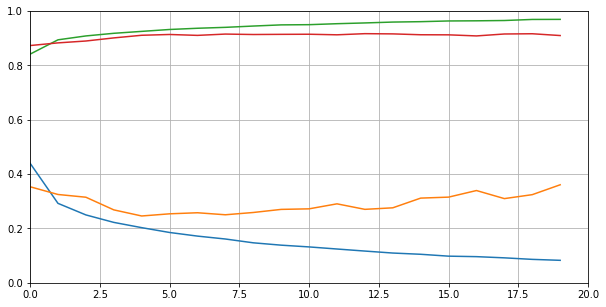

In [11]:
h=train.history
plt.figure(figsize=(10,5))
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])
plt.grid(True)
plt.axis([0,20,0,1])

Nº total de erros: 903


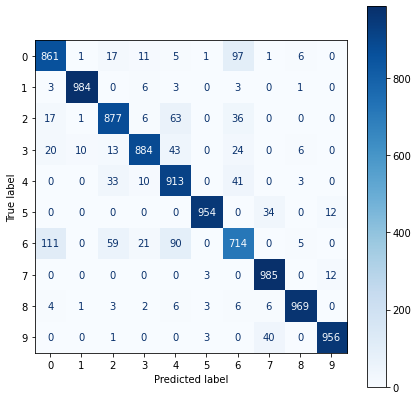

In [12]:
Y2e=cnn.predict(X2b)
y2e=np.argmax(Y2e,axis=1)

CM=confusion_matrix(y2,y2e)
print('Nº total de erros:',np.sum(y2!=y2e))
disp=ConfusionMatrixDisplay(CM)
fg,ax=plt.subplots(figsize=(7,7))
disp.plot(cmap='Blues',ax=ax)

In [13]:
for i,n in enumerate(classNames):
    print('%d: %s'%(i,n))


0: T-shirt
1: Trouser
2: Pullover
3: Dress
4: Coat
5: Sandal
6: Shirt
7: Sneaker
8: Bag
9: Boot


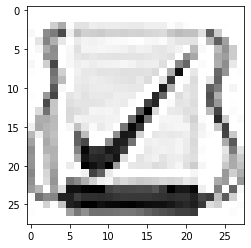

In [15]:
idx=np.argwhere((y2e==5)&(y2==8)).squeeze()
plt.imshow(X2[idx[0]],cmap='binary')

####  data normalization

In [8]:
X1Nb=X1b/255.
X2Nb=X2b/255.

In [9]:
cnn=keras.Sequential()
cnn.add(keras.layers.Conv2D(16,(3,3),input_shape=(28,28,1),activation='relu',padding='same'))
cnn.add(keras.layers.Conv2D(16,(3,3),activation='relu',padding='same'))
cnn.add(keras.layers.Conv2D(16,(3,3),activation='relu',padding='same'))
cnn.add(keras.layers.AveragePooling2D((2,2)))
cnn.add(keras.layers.Conv2D(16*2,(3,3),activation='relu',padding='same'))
cnn.add(keras.layers.Conv2D(16*2,(3,3),activation='relu',padding='same'))
cnn.add(keras.layers.Conv2D(16*2,(3,3),activation='relu',padding='same'))
cnn.add(keras.layers.AveragePooling2D((2,2)))
cnn.add(keras.layers.Conv2D(16*4,(3,3),activation='relu',padding='same'))
cnn.add(keras.layers.Conv2D(16*4,(3,3),activation='relu',padding='same'))
cnn.add(keras.layers.Conv2D(16*4,(3,3),activation='relu',padding='valid'))
cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(50,activation='relu'))
cnn.add(keras.layers.Dense(10,activation='softmax'))

In [10]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 32)        9

In [11]:
cnn.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['accuracy'])
train=cnn.fit(X1Nb,Y1,epochs=20,batch_size=50,validation_data=(X2Nb,Y2))

Epoch 1/20
1200/1200 [==============================] - 57s 42ms/step - loss: 0.4918 - accuracy: 0.8192 - val_loss: 0.3587 - val_accuracy: 0.8638
Epoch 2/20
1200/1200 [==============================] - 49s 41ms/step - loss: 0.3028 - accuracy: 0.8867 - val_loss: 0.2983 - val_accuracy: 0.8946
Epoch 3/20
1200/1200 [==============================] - 49s 41ms/step - loss: 0.2532 - accuracy: 0.9068 - val_loss: 0.2564 - val_accuracy: 0.9040
Epoch 4/20
1200/1200 [==============================] - 49s 41ms/step - loss: 0.2231 - accuracy: 0.9176 - val_loss: 0.2453 - val_accuracy: 0.9104
Epoch 5/20
1200/1200 [==============================] - 50s 42ms/step - loss: 0.2024 - accuracy: 0.9261 - val_loss: 0.2477 - val_accuracy: 0.9104
Epoch 6/20
1200/1200 [==============================] - 50s 42ms/step - loss: 0.1817 - accuracy: 0.9324 - val_loss: 0.2407 - val_accuracy: 0.9140
Epoch 7/20
1200/1200 [==============================] - 49s 41ms/step - loss: 0.1675 - accuracy: 0.9368 - val_loss: 0.2396 -

(0.0, 20.0, 0.0, 1.0)

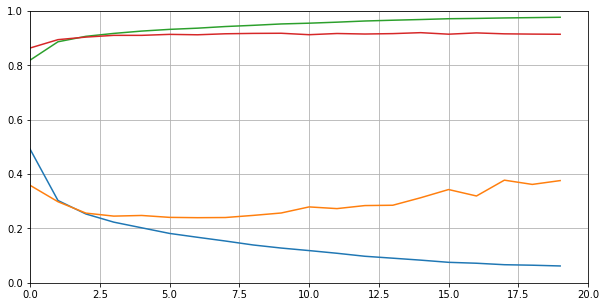

In [12]:
h=train.history
plt.figure(figsize=(10,5))
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])
plt.grid(True)
plt.axis([0,20,0,1])

Nº total de erros: 856 (acc=91.4)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:72: FutureWarning: Pass display_labels=['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Boot'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


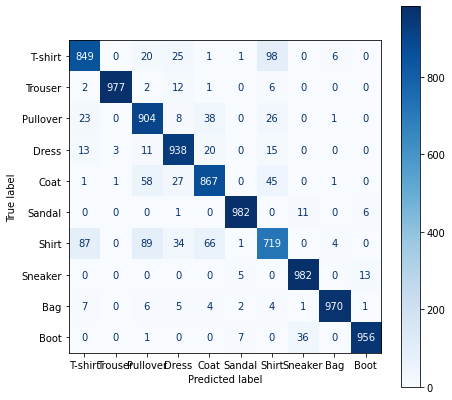

In [13]:
Y2e=cnn.predict(X2Nb)
y2e=np.argmax(Y2e,axis=1)

CM=confusion_matrix(y2,y2e)
print('Nº total de erros: %d (acc=%.1f)'%(np.sum(y2!=y2e),np.sum(y2==y2e)/X2Nb.shape[0]*100))
disp=ConfusionMatrixDisplay(CM,classNames)
fg,ax=plt.subplots(figsize=(7,7))
disp.plot(cmap='Blues',ax=ax)

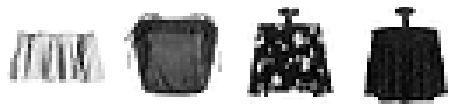

In [14]:
idx=np.argwhere((y2e==8)&(y2==6))
idx
plt.figure(figsize=(8,4))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(X2[idx[i]].squeeze(),cmap='binary')
    plt.axis('off')

[[3466]]


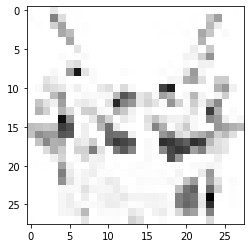

In [15]:
idx=np.argwhere((y2e==5)&(y2==0))
print(idx)
plt.imshow(X2[idx[0]].squeeze(),cmap='binary')

## CIFAR10

(-0.5, 31.5, 31.5, -0.5)

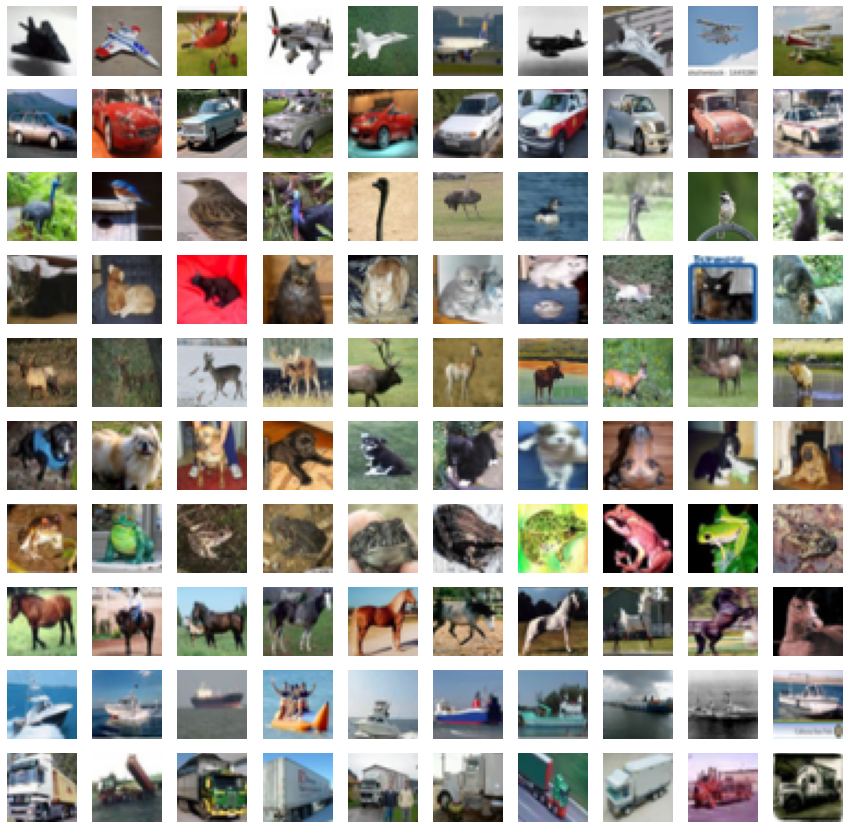

In [2]:
cifar10=keras.datasets.cifar10
(X1,y1),(X2,y2)=cifar10.load_data()
X1=X1
X2=X2
y1=y1.squeeze()
y2=y2.squeeze()
plt.figure(figsize=(15,15))
c=1
for i in range(10):
    idx=np.argwhere(y1==i).squeeze()
    for j in range(10):
        plt.subplot(10,10,c)
        plt.imshow(X1[idx[j]])
        plt.axis('off')
        c=c+1



plt.axis('off')

In [3]:
X1=X1/255.
X2=X2/255.
Y1=keras.utils.to_categorical(y1)
Y2=keras.utils.to_categorical(y2)

In [4]:
cnn=keras.Sequential()
cnn.add(keras.layers.Conv2D(16,(3,3),input_shape=(32,32,3),activation='relu',padding='same'))
cnn.add(keras.layers.Conv2D(16,(3,3),activation='relu',padding='same'))
cnn.add(keras.layers.Conv2D(16,(3,3),activation='relu',padding='same'))
cnn.add(keras.layers.AveragePooling2D((2,2)))
cnn.add(keras.layers.Conv2D(16*2,(3,3),activation='relu',padding='same'))
cnn.add(keras.layers.Conv2D(16*2,(3,3),activation='relu',padding='same'))
cnn.add(keras.layers.Conv2D(16*2,(3,3),activation='relu',padding='same'))
cnn.add(keras.layers.AveragePooling2D((2,2)))
cnn.add(keras.layers.Conv2D(16*4,(3,3),activation='relu',padding='same'))
cnn.add(keras.layers.Conv2D(16*4,(3,3),activation='relu',padding='valid'))
cnn.add(keras.layers.Conv2D(16*4,(3,3),activation='relu',padding='valid'))
cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(20,activation='relu'))
cnn.add(keras.layers.Dense(10,activation='softmax'))

In [5]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        2320      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 16)        2320      
_________________________________________________________________
average_pooling2d (AveragePo (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        9

In [6]:
cnn.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['accuracy'])
train=cnn.fit(X1,Y1,epochs=20,batch_size=10,validation_data=(X2,Y2))

Epoch 1/20
5000/5000 [==============================] - 86s 16ms/step - loss: 1.7404 - accuracy: 0.3442 - val_loss: 1.4308 - val_accuracy: 0.4770
Epoch 2/20
5000/5000 [==============================] - 75s 15ms/step - loss: 1.2824 - accuracy: 0.5347 - val_loss: 1.1688 - val_accuracy: 0.5872
Epoch 3/20
5000/5000 [==============================] - 76s 15ms/step - loss: 1.0853 - accuracy: 0.6126 - val_loss: 1.0385 - val_accuracy: 0.6305
Epoch 4/20
5000/5000 [==============================] - 76s 15ms/step - loss: 0.9709 - accuracy: 0.6521 - val_loss: 1.0169 - val_accuracy: 0.6452
Epoch 5/20
5000/5000 [==============================] - 78s 16ms/step - loss: 0.8902 - accuracy: 0.6859 - val_loss: 0.9106 - val_accuracy: 0.6896
Epoch 6/20
5000/5000 [==============================] - 78s 16ms/step - loss: 0.8226 - accuracy: 0.7099 - val_loss: 0.8813 - val_accuracy: 0.7028
Epoch 7/20
5000/5000 [==============================] - 77s 15ms/step - loss: 0.7660 - accuracy: 0.7307 - val_loss: 0.9056 -

(0.0, 20.0, 0.0, 1.0)

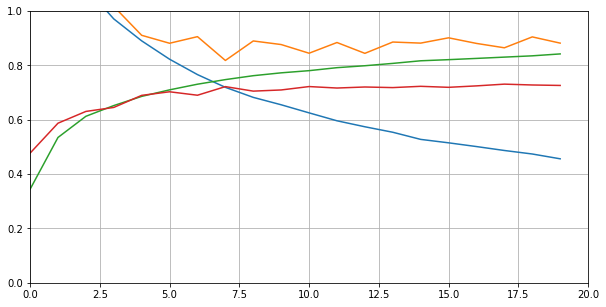

In [8]:
h=train.history
plt.figure(figsize=(10,5))
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])
plt.grid(True)
plt.axis([0,20,0,1])

Nº total de erros: 2739 (acc=72.6)


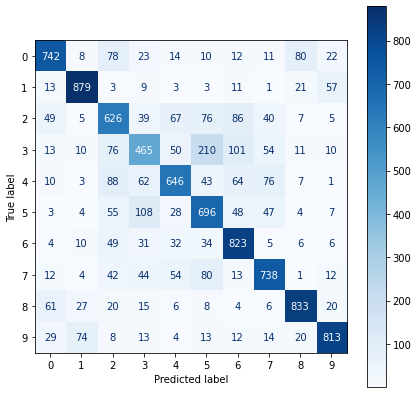

In [9]:
Y2e=cnn.predict(X2)
y2e=np.argmax(Y2e,axis=1)

CM=confusion_matrix(y2,y2e)
print('Nº total de erros: %d (acc=%.1f)'%(np.sum(y2!=y2e),np.sum(y2==y2e)/X2.shape[0]*100))
disp=ConfusionMatrixDisplay(CM)
fg,ax=plt.subplots(figsize=(7,7))
disp.plot(cmap='Blues',ax=ax)

In [10]:
cnn.save('cnnCIFAR10.h5')